# Library Instalations


In [ ]:
!pip -q install torch torchvision segment_anything timm \
                opencv-python scikit-image pycocotools scipy segment-anything

import importlib, warnings, pkg_resources, sys, json, pathlib
from types import SimpleNamespace

# Reunimos imports de uso habitual en un contenedor simple
deps = SimpleNamespace()
import torch, torchvision, cv2, timm, math, random, os, numpy as np
from skimage import exposure
from scipy import stats
from pycocotools.coco import COCO
from segment_anything import sam_model_registry, SamPredictor
deps.torch, deps.tv, deps.cv2, deps.np = torch, torchvision, cv2, np
deps.exposure, deps.stats, deps.COCO = exposure, stats, COCO
deps.sam_model_registry, deps.SamPredictor = sam_model_registry, SamPredictor
print("✔ Entorno listo — GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")


## Hugging Face login

In [ ]:
!pip install -q huggingface_hub

from huggingface_hub import notebook_login

notebook_login()

# Datasets Preparation

## Cataract Dataset

In [ ]:
from data import CataractDatasetPrep

prep = CataractDatasetPrep(
    root="/content/cataract-seg.v2-with-augmentation.coco-segmentation")
prep.run()


# Ejemplo de distribución de los datos en el histograma con diferentes bins

c:\Users\nitro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


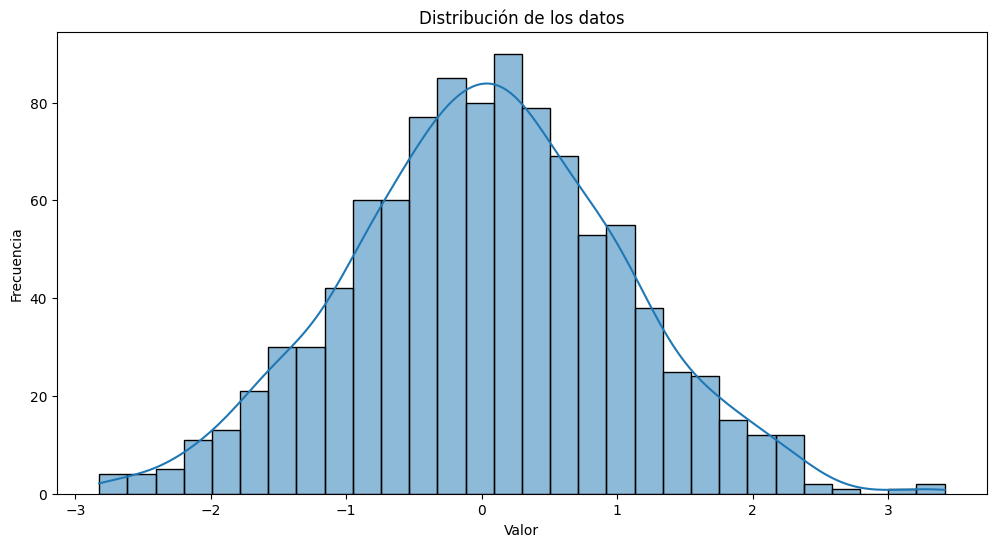

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Datos de ejemplo (distribución normal con 1000 puntos)
data = np.random.normal(0, 1, 1000)

# Visualización de los datos
plt.figure(figsize=(12, 6))
sns.histplot(data, bins=30, kde=True)
plt.title('Distribución de los datos')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

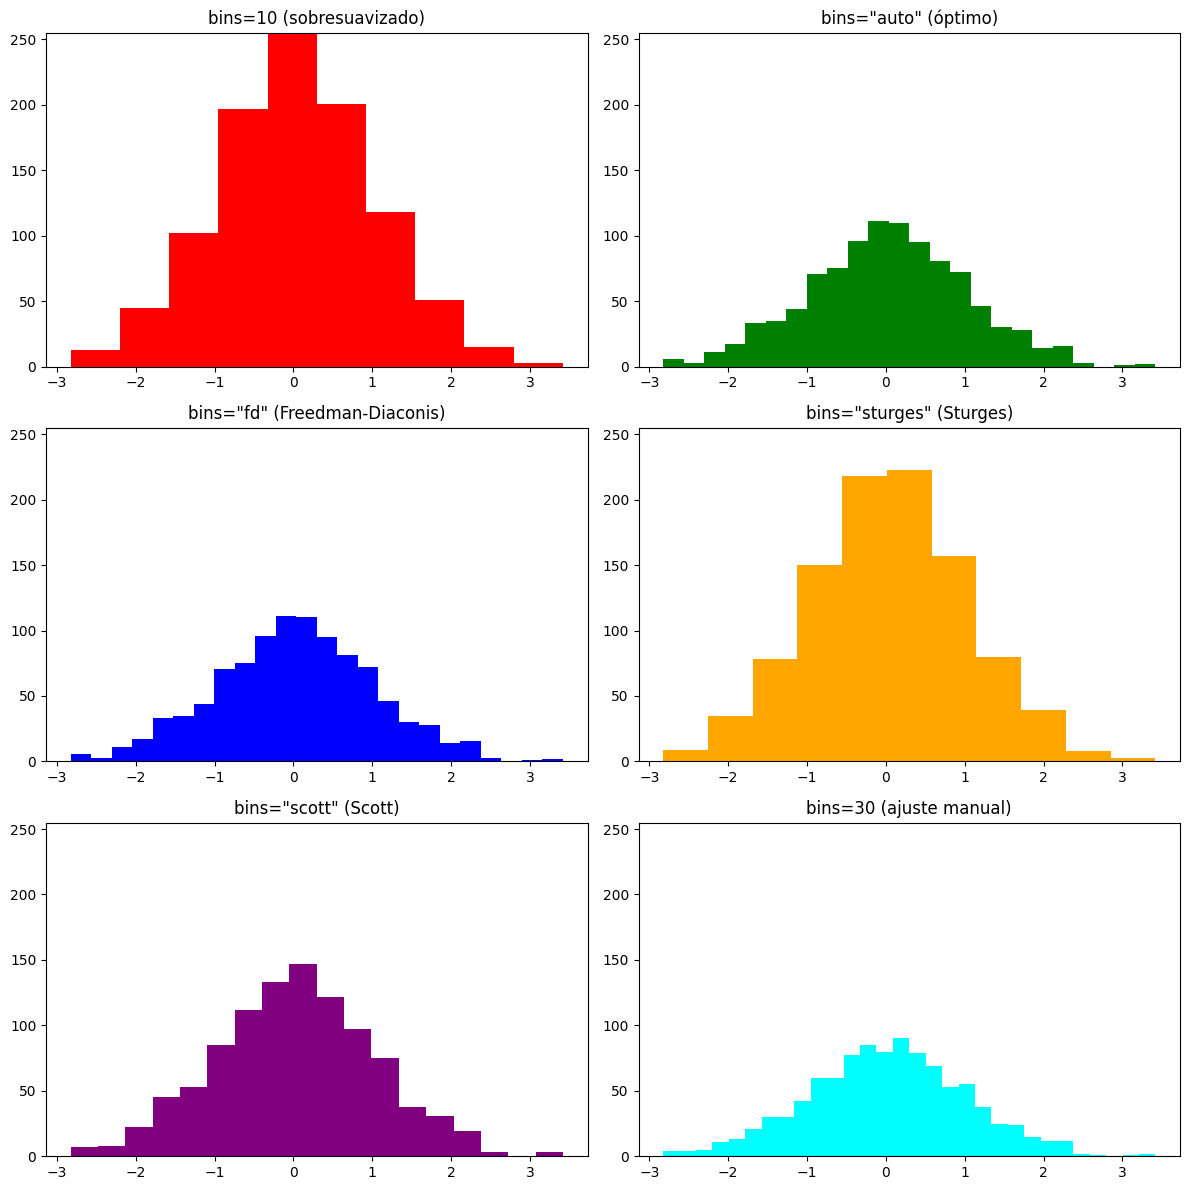

In [8]:
# Encontrar el máximo valor de frecuencia entre todos los histogramas
hist_max = 0
bins_list = [10, 'auto', 'fd', 'sturges', 'scott', 30]
for bins in bins_list:
    counts, _ = np.histogram(data, bins=bins)
    hist_max = max(hist_max, counts.max())

# Volver a graficar los histogramas con el mismo límite en el eje y
fig, ax = plt.subplots(3, 2, figsize=(12, 12))

ax[0, 0].hist(data, bins=10, color='red')
ax[0, 0].set_title('bins=10 (sobresuavizado)')
ax[0, 0].set_ylim(0, hist_max)

ax[0, 1].hist(data, bins='auto', color='green')
ax[0, 1].set_title('bins="auto" (óptimo)')
ax[0, 1].set_ylim(0, hist_max)

ax[1, 0].hist(data, bins="fd", color='blue')
ax[1, 0].set_title('bins="fd" (Freedman-Diaconis)')
ax[1, 0].set_ylim(0, hist_max)

ax[1, 1].hist(data, bins='sturges', color='orange')
ax[1, 1].set_title('bins="sturges" (Sturges)')
ax[1, 1].set_ylim(0, hist_max)

ax[2, 0].hist(data, bins='scott', color='purple')
ax[2, 0].set_title('bins="scott" (Scott)')
ax[2, 0].set_ylim(0, hist_max)

ax[2, 1].hist(data, bins=30, color='cyan')
ax[2, 1].set_title('bins=30 (ajuste manual)')
ax[2, 1].set_ylim(0, hist_max)

plt.tight_layout()
plt.show()